# Day 2 - p2 - Selecting Rows

In [1]:
from datascience import *
import numpy as np

<center><img src="summary1.png"  width="800"/></center>

# Sorting Tables

* The `sort` method creates a new table with the same rows in a different order (the original table is unaffected).

* The `show` method displays the first rows of a table

In [169]:
nba = Table.read_table('nba_salaries.csv') # Larger tables have rows omitted
nba 

PLAYER,POSITION,TEAM,'15-'16 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


In [192]:
nba.sort(3, descending=True).where("POSITION","C").select(0).take(0,1,2)

PLAYER
Dwight Howard
Marc Gasol
Enes Kanter


# About the data

<center><img src="nba_description.png"  width="800"/></center>

### In 2015-16, what was the total payroll for all NBA teams combined?

In [5]:
nba.column(3).sum() #about 2 billion

2116.197639

### What's the largest salary in the NBA in 2015-16? Who earned it?

In [3]:
nba.sort(3, descending=True).column('PLAYER')[0]

'Kobe Bryant'

### How about the top 5?

In [13]:
nba.sort(3, descending=True).show(5)

PLAYER,POSITION,TEAM,'15-'16 SALARY
Kobe Bryant,SF,Los Angeles Lakers,25
Joe Johnson,SF,Brooklyn Nets,24.8949
LeBron James,SF,Cleveland Cavaliers,22.9705
Carmelo Anthony,SF,New York Knicks,22.875
Dwight Howard,C,Houston Rockets,22.3594


### What are the optional arguments for `sort`?
* `descending=True`, sorts the column in descending order (default: ascending order).
* `distinct=True`, omits repeated values of the column, keeping the only the first. 

### What does the code below do?

In [70]:
nba=nba.with_column('SALARY amax',nba.column(3))

In [81]:
nba.sort(3, descending=True).sort(1, distinct=True).select(1,4)
# No overlap in each position 

POSITION,SALARY amax
C,22.3594
PF,22.1927
PG,21.4687
SF,25
SG,20


In [91]:
nba.sort(3, descending=True).sort(1, distinct=True)

PLAYER,POSITION,TEAM,'15-'16 SALARY,SALARY amax
Dwight Howard,C,Houston Rockets,22.3594,22.3594
Chris Bosh,PF,Miami Heat,22.1927,22.1927
Chris Paul,PG,Los Angeles Clippers,21.4687,21.4687
Kobe Bryant,SF,Los Angeles Lakers,25,25
Dwyane Wade,SG,Miami Heat,20,20


In [63]:
nba.with_column('SALARY amax',nba.column(3))

PLAYER,POSITION,TEAM,'15-'16 SALARY,SALARY amax
Paul Millsap,PF,Atlanta Hawks,18.6717,18.6717
Al Horford,C,Atlanta Hawks,12,12
Tiago Splitter,C,Atlanta Hawks,9.75625,9.75625
Jeff Teague,PG,Atlanta Hawks,8,8
Kyle Korver,SG,Atlanta Hawks,5.74648,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4,4
Mike Scott,PF,Atlanta Hawks,3.33333,3.33333
Kent Bazemore,SF,Atlanta Hawks,2,2
Dennis Schroder,PG,Atlanta Hawks,1.7634,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452,1.30452


<center><img src="q7.png"  width="1000"/></center>

In [164]:
nba.sort(3, descending=True).where('TEAM',"Atlanta Hawks").num_rows

14

In [168]:
nba.with_column("A",int(nba.column(3)))

TypeError: only size-1 arrays can be converted to Python scalars

In [144]:
nba_messedUp=nba.with_row(['Paul Cao' , 'PG', 'Fudan', 0.02])

# Digression: Lists

What happens when you make an array with objects of different types?

In [ ]:
data = make_array(1, 3.1415, 'n/a')
data

Wait, what is the type of the first element?

In [ ]:
type(data.item(0))

## Lists are generic sequences

- Arrays should only hold objects of one type.
- But `list`s can hold objects of different types.

In [ ]:
[1, 3.1415, 'hey']

## If lists are more general, why use arrays at all?

Big reason: arrays are fast.

In [ ]:
# an array and a list with the same data
n = 9999999
arr = np.arange(n)
lst = list(range(n))

In [ ]:
%timeit arr.sum() # work with array

In [ ]:
%timeit sum(lst) # work with list

## Creating tables from lists

Passing a list to `.with_column` converts it to an array implicity.

In [ ]:
data = Table().with_column('Stuff', [1, 3.1415, 'hey'])
data

But look at the types...

In [ ]:
data.column('Stuff')

# Getting rows

In [ ]:
nba = Table.read_table('nba_salaries.csv')
nba

## `.select()` columns, `.take()`rows

- We know that `.select()` returns a table with the requested columns
- To get a *table* with requested rows, use `.take()`
- As with `.item()`, counting starts with 0

In [17]:
# get the first row
nba.take(0)

PLAYER,POSITION,TEAM,'15-'16 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717


## Multiple rows

Take multiple rows by providing a list of row indices:

In [18]:
nba.take([0,5,6])

PLAYER,POSITION,TEAM,'15-'16 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333


In [19]:
#: indices have to be in a list or array
nba.take(0, 5, 6)

PLAYER,POSITION,TEAM,'15-'16 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333


## Discuss

For columns, we have:

- `.select()`: returns a table
- `.column()`: returns an array

For rows, we just have:

- `.take()`: returns a table

Why don't we have something that returns a row as an array?

# Retrieving a row 

In [20]:
nba.row(0)

Row(PLAYER='Paul Millsap', POSITION='PF', TEAM='Atlanta Hawks', '15-'16 SALARY=18.671659)

In [21]:
#compare to
nba.take(0)

PLAYER,POSITION,TEAM,'15-'16 SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717


# Retrieving rows conditionally

- We often want to grab a subset of rows *conditionally*, when some condition is satisfied.
- Examples:
    - All NBA players who make over 20 million / year.
    - All point guards (PGs) and centers (Cs).
    - Any player with more than 20 letters in their name

## Predicates

- A predicate is a function that returns `True` or `False`.
- We use predicates as conditions, keeping only rows that satisfy the condition.
- Apply a predicate to each item in a column.
    - Keep entries for which it is `True`.
    - Discard those for which it is `False`.

## The `.where()` method

- Applies a predicate to a column.
- Returns a new table containing only the rows where the predicate is `True`.
- Many predicates are provided.

In [6]:
nba.where("'15-'16 SALARY", are.above(20))

PLAYER,POSITION,TEAM,'15-'16 SALARY
Joe Johnson,SF,Brooklyn Nets,24.8949
Derrick Rose,PG,Chicago Bulls,20.0931
LeBron James,SF,Cleveland Cavaliers,22.9705
Dwight Howard,C,Houston Rockets,22.3594
Chris Paul,PG,Los Angeles Clippers,21.4687
Kobe Bryant,SF,Los Angeles Lakers,25
Chris Bosh,PF,Miami Heat,22.1927
Carmelo Anthony,SF,New York Knicks,22.875
Kevin Durant,SF,Oklahoma City Thunder,20.1586


## Provided predicates

|Predicate|Description|
|---------|-----------|
|`are.above(y)`|Greater than y|
|`are.above_or_equal_to(y)`|Greater than or equal to y|
|`are.below(y)`|Less than y|
|`are.below_or_equal_to(y)`|Less than or equal to y|
|`are.between(y, z)`|Greater than or equal to y and less than z|
|`are.between_or_equal_to(y, z)`|Greater than or equal to y and less than or equal to z|
|`are.contained_in(superstring)`|A string that is part of the given superstring|
|`are.containing(substring)`|A string that contains within it the given substring|
|`are.equal_to(y)`|Equal to y|
|`are.not_above(y)`|Is not above |
|`are.not_above_or_equal_to(y)`|Is neither above y nor equal to |
|`are.not_below(y)`|Is not below |
|`are.not_below_or_equal_to(y)`|Is neither below y nor equal to |
|`are.not_between(y, z)`|Is equal to y or less than y or greater than |
|`are.not_between_or_equal_to(y, z)`|Is less than y or greater than |
|`are.not_contained_in(superstring)`|A string that is not contained within the superstrin|
|`are.not_containing(substring)`|A string that does not contain substrin|
|`are.not_equal_to(y)`|Is not equal to |
|`are.not_strictly_between(y, z)`|Is equal to y or equal to z or less than y or greater than |
|`are.strictly_between(y, z)`|Greater than y and less than z|

## Example

Get LeBron's row.

In [7]:
nba.where('PLAYER', are.equal_to('LeBron James'))

PLAYER,POSITION,TEAM,'15-'16 SALARY
LeBron James,SF,Cleveland Cavaliers,22.9705


In [12]:
a=nba['PLAYER']=

'LeBron James'

`are.equal_to` is the default behavior:

In [13]:
nba.where('PLAYER', 'LeBron James')

PLAYER,POSITION,TEAM,'15-'16 SALARY
LeBron James,PF,Atlanta Hawks,18.6717
LeBron James,C,Atlanta Hawks,12
LeBron James,C,Atlanta Hawks,9.75625
LeBron James,PG,Atlanta Hawks,8
LeBron James,SG,Atlanta Hawks,5.74648
LeBron James,SF,Atlanta Hawks,4
LeBron James,PF,Atlanta Hawks,3.33333
LeBron James,SF,Atlanta Hawks,2
LeBron James,PG,Atlanta Hawks,1.7634
LeBron James,SG,Atlanta Hawks,1.30452


## Example

Grab all players with a salary between 5 and 6 million.

In [18]:
nba.where("'15-'16 SALARY", are.between(5, 6)).show()

PLAYER,POSITION,TEAM,'15-'16 SALARY
LeBron James,SG,Atlanta Hawks,5.74648
LeBron James,PF,Boston Celtics,5
LeBron James,SG,Charlotte Hornets,5.675
LeBron James,PF,Chicago Bulls,5.54373
LeBron James,PG,Dallas Mavericks,5.37897
LeBron James,C,Dallas Mavericks,5.2
LeBron James,C,Denver Nuggets,5.6135
LeBron James,PG,Golden State Warriors,5.54373
LeBron James,SF,Indiana Pacers,5
LeBron James,SG,Los Angeles Clippers,5.675


## Example

Grab all of the players from Los Angeles .

In [15]:
nba.where('TEAM', are.containing('Los Angeles')).show(15)

PLAYER,POSITION,TEAM,'15-'16 SALARY
LeBron James,PG,Los Angeles Clippers,21.4687
LeBron James,PF,Los Angeles Clippers,18.9077
LeBron James,SG,Los Angeles Clippers,7.085
LeBron James,SG,Los Angeles Clippers,5.675
LeBron James,SF,Los Angeles Clippers,3.376
LeBron James,PG,Los Angeles Clippers,3.1108
LeBron James,SG,Los Angeles Clippers,1.15968
LeBron James,C,Los Angeles Clippers,1.1006
LeBron James,SF,Los Angeles Clippers,1.1006
LeBron James,SG,Los Angeles Clippers,1.01542


## Example

Find all teammates of LeBron James.

In [24]:
lebron = nba.where('PLAYER', 'LeBron James')# make table with just LeBron's row
team = lebron.column('TEAM').item(0)# extract his team name
lebrons_teammates = nba.where('TEAM', team).where('PLAYER', are.not_equal_to('LeBron James'))
lebrons_teammates  # make table with just his teammates

array([], dtype='<U12')

In [27]:
lebron

PLAYER,POSITION,TEAM,'15-'16 SALARY
LeBron James,PF,Atlanta Hawks,18.6717
LeBron James,C,Atlanta Hawks,12
LeBron James,C,Atlanta Hawks,9.75625
LeBron James,PG,Atlanta Hawks,8
LeBron James,SG,Atlanta Hawks,5.74648
LeBron James,SF,Atlanta Hawks,4
LeBron James,PF,Atlanta Hawks,3.33333
LeBron James,SF,Atlanta Hawks,2
LeBron James,PG,Atlanta Hawks,1.7634
LeBron James,SG,Atlanta Hawks,1.30452


## Example

Create an array containing the names of all point guards (PG) who made more than 15 million dollars.


In [25]:
nba.where(3, are.above(15)).where('POSITION', 'PG')

PLAYER,POSITION,TEAM,'15-'16 SALARY
LeBron James,PG,Chicago Bulls,20.0931
LeBron James,PG,Cleveland Cavaliers,16.4075
LeBron James,PG,Los Angeles Clippers,21.4687
LeBron James,PG,Oklahoma City Thunder,16.7442
LeBron James,PG,Washington Wizards,15.852


## Predicates are functions!

In [64]:
# this creates a new function, f
f = are.above(30)

In [ ]:
f(31)

In [ ]:
f(29)

## Looking ahead: creating own predicates

In Python, as in most languages, you can create your own functions.

In [67]:
#: we can define our own predicates...
def name_is_20_or_more_letters(name):
    return len(name) >= 20

In [ ]:
nba.where('PLAYER', name_is_20_or_more_letters)

# Discussion Question

`.with_row()` works like `.with_column()`, except you give a *list* of row entries. 

The table `nba` has columns `PLAYER`, `POSITION`, `TEAM`, `SALARY`. What is the output when we execute a cell containing these two lines of code?

```
nba.with_row(['Jazz Bear', 'Mascot', 'Utah Jazz', 100])
nba.where('PLAYER', are.containing('Bear'))
```

A. A table with one row for Jazz Bear  
B. An empty table with no rows  
C. An error message

In [70]:
nba = nba.with_row(['Jazz Bear', 'Mascot', 'Utah Jazz', 100])
nba.where('PLAYER', are.containing('Bear'))

PLAYER,POSITION,TEAM,'15-'16 SALARY
Jazz Bear,Mascot,Utah Jazz,100


<center><img src="summary2.png"  width="800"/></center>

# Practice: Census data

- Every ten years, the U.S. Census Bureau counts the number of people in the U.S.
- On other years, the bureau *estimates* the population
- Data is published online

In [29]:
census = Table.read_table('census.csv')
census.show()

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
0,0,3944153,3944160,3951330,3963087,3926540,3931141,3949775,3978038
0,1,3978070,3978090,3957888,3966551,3977939,3942872,3949776,3968564
0,2,4096929,4096939,4090862,3971565,3980095,3992720,3959664,3966583
0,3,4119040,4119051,4111920,4102470,3983157,3992734,4007079,3974061
0,4,4063170,4063186,4077551,4122294,4112849,3994449,4005716,4020035
0,5,4056858,4056872,4064653,4087709,4132242,4123626,4006900,4018158
0,6,4066381,4066412,4073013,4074993,4097605,4142916,4135930,4019207
0,7,4030579,4030594,4043046,4083225,4084913,4108349,4155326,4148360
0,8,4046486,4046497,4025604,4053203,4093177,4095711,4120903,4167887
0,9,4148353,4148369,4125415,4035710,4063152,4104072,4108349,4133564


## What do we have?

A description of the dataset is available at [census.gov](https://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.pdf).

Unfortunately...

<center>
<img src="./moved.png" width=50%>
</center>

## What are the column labels?

In [30]:
census.labels

('SEX',
 'AGE',
 'CENSUS2010POP',
 'ESTIMATESBASE2010',
 'POPESTIMATE2010',
 'POPESTIMATE2011',
 'POPESTIMATE2012',
 'POPESTIMATE2013',
 'POPESTIMATE2014',
 'POPESTIMATE2015')

## What values occur in each column?

Use `np.unique` to get the unique values.

In [31]:
# what ages occur in the data?
np.unique(census.column('AGE'))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 999])

Wait, `999`?

## What is `999` used for?

In [32]:
census.where('AGE', 999)

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
0,999,308745538,308758105,309346863,311718857,314102623,316427395,318907401,321418820
1,999,151781326,151788777,152088043,153291772,154521077,155706770,156955337,158229297
2,999,156964212,156969328,157258820,158427085,159581546,160720625,161952064,163189523


- It looks like `999` means *all ages together*.
- Similarly, a `SEX` of `0` means *all sexes together*.

## Discuss

Using the data alone, how might we make an educated guess as to which value of `SEX` means "male" and which means "female"?

In [33]:
census.where('AGE', 87)

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
0,87,712908,713046,721196,741551,756097,751513,768676,774639
1,87,249803,249840,253621,261735,269496,272275,282423,287383
2,87,463105,463206,467575,479816,486601,479238,486253,487256


- Women tend to live longer. This suggests that `1` is "male" and `2` is "female".

## Analyzing population trends

Let's look at how the population changed between 2010 and 2015.

In [34]:
# we only need a few columns
us_pop = census.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2015')

In [35]:
us_pop

SEX,AGE,POPESTIMATE2010,POPESTIMATE2015
0,0,3951330,3978038
0,1,3957888,3968564
0,2,4090862,3966583
0,3,4111920,3974061
0,4,4077551,4020035
0,5,4064653,4018158
0,6,4073013,4019207
0,7,4043046,4148360
0,8,4025604,4167887
0,9,4125415,4133564


In [36]:
# we don't like to type POPESTIMATE2010. Relabel to something shorter...
us_pop = us_pop.relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2015', '2015')
us_pop

SEX,AGE,2010,2015
0,0,3951330,3978038
0,1,3957888,3968564
0,2,4090862,3966583
0,3,4111920,3974061
0,4,4077551,4020035
0,5,4064653,4018158
0,6,4073013,4019207
0,7,4043046,4148360
0,8,4025604,4167887
0,9,4125415,4133564


## Population changes

Compute absolute and percentage changes.

In [37]:
us_pop = us_pop.with_column(
    'CHANGE',
    us_pop.column('2015') - us_pop.column('2010')
)

In [38]:
us_pop = us_pop.with_column(
    'PCT CHANGE',
    us_pop.column('CHANGE') / us_pop.column('2010')
    )
us_pop

SEX,AGE,2010,2015,CHANGE,PCT CHANGE
0,0,3951330,3978038,26708,0.00675924
0,1,3957888,3968564,10676,0.0026974
0,2,4090862,3966583,-124279,-0.0303797
0,3,4111920,3974061,-137859,-0.0335267
0,4,4077551,4020035,-57516,-0.0141055
0,5,4064653,4018158,-46495,-0.0114389
0,6,4073013,4019207,-53806,-0.0132104
0,7,4043046,4148360,105314,0.0260482
0,8,4025604,4167887,142283,0.0353445
0,9,4125415,4133564,8149,0.00197532


In [40]:
us_pop.sort('CHANGE',descending=True)

SEX,AGE,2010,2015,CHANGE,PCT CHANGE
0,999,309346863,321418820,12071957,0.039024
1,999,152088043,158229297,6141254,0.0403796
2,999,157258820,163189523,5930703,0.037713
0,68,2359816,3436357,1076541,0.456197
0,64,2706055,3536156,830101,0.306757
0,65,2678525,3450043,771518,0.288038
0,66,2621335,3344134,722799,0.275737
0,67,2693707,3304187,610480,0.226632
0,72,1883820,2469605,585785,0.310956
2,68,1254117,1812428,558311,0.445183


In [41]:
2015-68
#Post War

1947

## Display percentages nicely

In [42]:
us_pop.set_format('PCT CHANGE', PercentFormatter)

SEX,AGE,2010,2015,CHANGE,PCT CHANGE
0,0,3951330,3978038,26708,0.68%
0,1,3957888,3968564,10676,0.27%
0,2,4090862,3966583,-124279,-3.04%
0,3,4111920,3974061,-137859,-3.35%
0,4,4077551,4020035,-57516,-1.41%
0,5,4064653,4018158,-46495,-1.14%
0,6,4073013,4019207,-53806,-1.32%
0,7,4043046,4148360,105314,2.60%
0,8,4025604,4167887,142283,3.53%
0,9,4125415,4133564,8149,0.20%


## What age group(s) grew the most in size?

1. Any guesses?
2. How could we find out?

In [43]:
us_pop.sort('CHANGE', descending=True)

SEX,AGE,2010,2015,CHANGE,PCT CHANGE
0,999,309346863,321418820,12071957,3.90%
1,999,152088043,158229297,6141254,4.04%
2,999,157258820,163189523,5930703,3.77%
0,68,2359816,3436357,1076541,45.62%
0,64,2706055,3536156,830101,30.68%
0,65,2678525,3450043,771518,28.80%
0,66,2621335,3344134,722799,27.57%
0,67,2693707,3304187,610480,22.66%
0,72,1883820,2469605,585785,31.10%
2,68,1254117,1812428,558311,44.52%


## Why?

In [ ]:
2010 - 68

In [ ]:
2015 - 68

The post-WWII baby boom.

## How does female:male ratio change with age?

General approach:  
1. Keep data for only one year (say, 2015).
2. Make a table of females and a table of males.
3. Divide # of females at each age by # of males at that age.

## 1. Keep data for only 2015

In [44]:
us_pop_2015 = us_pop.select('SEX', 'AGE', '2015')
us_pop_2015

SEX,AGE,2015
0,0,3978038
0,1,3968564
0,2,3966583
0,3,3974061
0,4,4020035
0,5,4018158
0,6,4019207
0,7,4148360
0,8,4167887
0,9,4133564


## 2. Make a table of females and a table of males

In [45]:
females = us_pop_2015.where('SEX', 2).where('AGE', are.not_equal_to(999))
females

SEX,AGE,2015
2,0,1942904
2,1,1939269
2,2,1939979
2,3,1943417
2,4,1964111
2,5,1967310
2,6,1968544
2,7,2031242
2,8,2039062
2,9,2021886


In [46]:
males = us_pop_2015.where('SEX', 1).where('AGE', are.not_equal_to(999))
males

SEX,AGE,2015
1,0,2035134
1,1,2029295
1,2,2026604
1,3,2030644
1,4,2055924
1,5,2050848
1,6,2050663
1,7,2117118
1,8,2128825
1,9,2111678


## 3. Divide # of females at each age by # of males at that age

In [47]:
# we should "align" the data first to make sure rows are in the same order
females = females.sort('AGE')
males = males.sort('AGE')

In [48]:
ratios = Table().with_columns(
    'AGE', females.column('AGE'),
    'F:M RATIO', females.column('2015') / males.column('2015')
)
ratios

AGE,F:M RATIO
0,0.954681
1,0.955637
2,0.957256
3,0.957045
4,0.955342
5,0.959267
6,0.959955
7,0.959437
8,0.957834
9,0.957478


In [49]:
ratios.sort('AGE')

AGE,F:M RATIO
0,0.954681
1,0.955637
2,0.957256
3,0.957045
4,0.955342
5,0.959267
6,0.959955
7,0.959437
8,0.957834
9,0.957478


In [50]:
ratios.sort('AGE', descending=True)

AGE,F:M RATIO
100,4.10167
99,3.55685
98,3.21163
97,3.00039
96,2.77128
95,2.6241
94,2.42141
93,2.31385
92,2.16829
91,2.08195


## Visualize

In [53]:
#: a few new imports for displaying nice plots
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

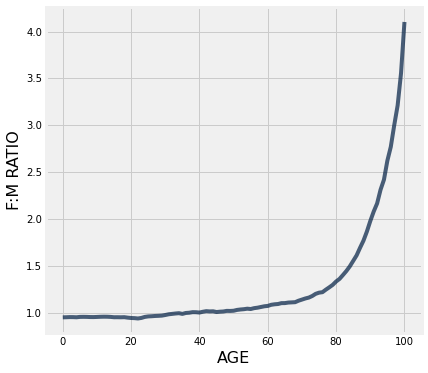

In [54]:
ratios.plot('AGE')

## Why? Our data analysis raises questions that are the topic of research.

[Why do women live longer than men?](https://ourworldindata.org/why-do-women-live-longer-than-men)

[Why are there more baby boys than baby girls?](https://www.pewresearch.org/fact-tank/2013/09/24/the-odds-that-you-will-give-birth-to-a-boy-or-girl-depend-on-where-in-the-world-you-live/)